In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.4.0'

In [4]:
tf.__version__

'2.3.0'

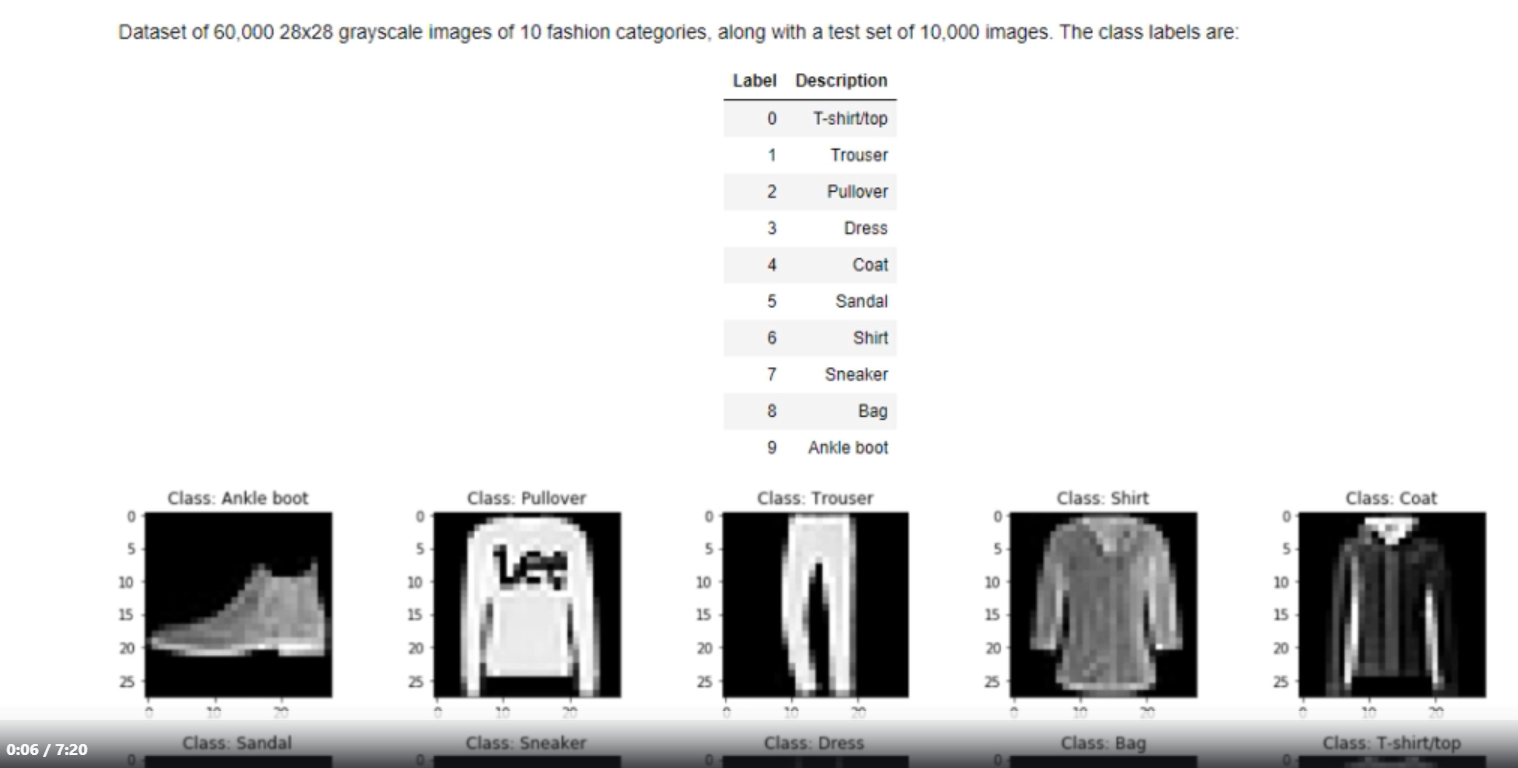

In [5]:
#Using keras in-built dataset
# The images in dataset are of 28X28 gray scale format
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

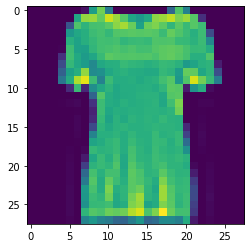

In [6]:
plt.imshow(X_train_full[10]) # imshow method - to view the data
# 0 - image at location 0 
# we can change the location and view other images also

In [7]:
y_train_full[0] # output 9 - stands for ankel boot

9

In [8]:
class_names = ["T-shirt/Top","trouser","Pullover","Dress","Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [9]:
class_names[y_train_full[10]]

'T-shirt/Top'

In [10]:
X_train_full[10] # these are pixel values of 1 image row by row (col X row = 28X28) in dataset

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data Normalization
#### We then normalize the data dimensions so that they are of approximately the same scale

In [11]:
# to do that we just divide all the pixel intensities with 255
# since, we know pixel intensity lies between 0 to 255
# Dividing with float value since we want the output to be float 
X_train_n = X_train_full /255.0
X_test_n = X_test /255.0
# this normalization is diff from which we do in ML

### Split the data into train/validation/test dataset
#### In earlier step of importing data, we had 60,000 dataset for training and 10,000 for test dataset. Now we further split the training data into train/Validation. here is how each type of dataset is used in deep learning

#### 1] Training data - Used for training the model
#### 2] Validation data - Used for tuning the hyperparameters and evaluate the models or just to optimize the performance of our model
#### 3] Test data - Used to test the model after the model has gone through initial vetting by the validation set.

In [12]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [13]:
X_valid[0] # now the values are between 0 and 1 
# dataset is normalized

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# we have perpared out data for image classifier
# the next step is model creation


### Create the model architecture
#### There are two ways for defining a model in keras:
#### 1] Sequence model API - It is simple 
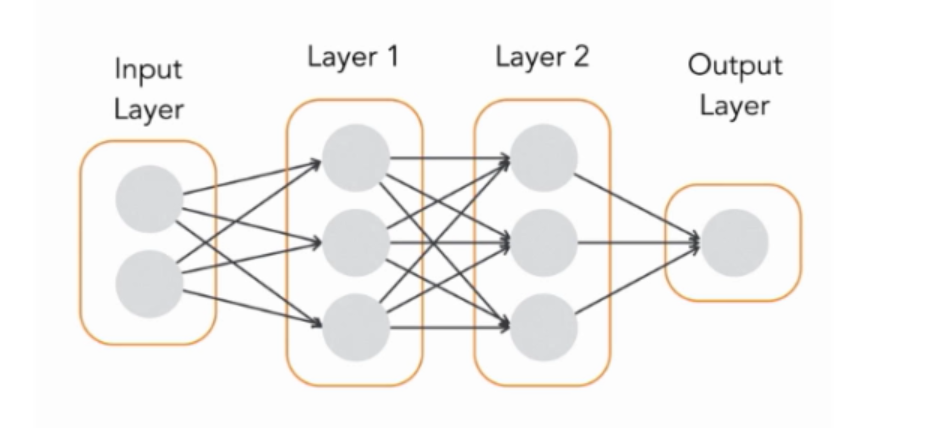

#### 2] Functional API - It is little bit complex but gives flexibility to create some complex neural networks
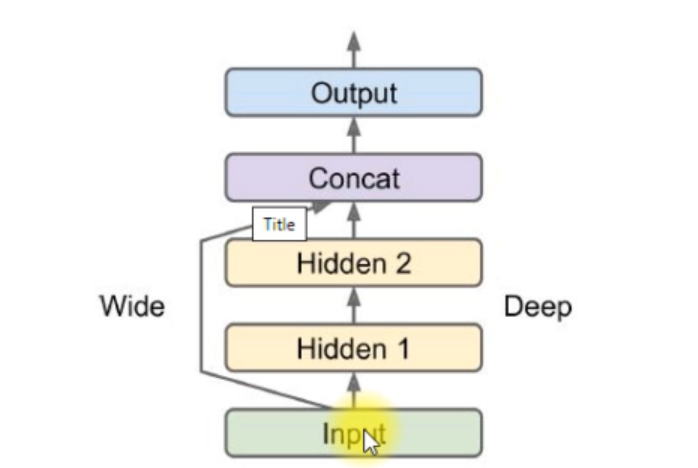

In [15]:
#random seed is used to replicate same result everytime
np.random.seed(42)
tf.random.set_seed(42)
#The below is we have observations in 28 X 28 pixel form
# Observations are in 2D array
# Output we want is 10 categories 
# these categories are exclusive i.e a single image can either be shirt or boot or T-shirt any one thing
# first converting 2D obs. into flat 1D obs. So we can get 784(28*28) instead of 28 X 28
# create 2 Hidden layers 
# we always prefer Relu for classfication models
# This 10 categories are exclusive and this is classification model we will be using Softmax Activation


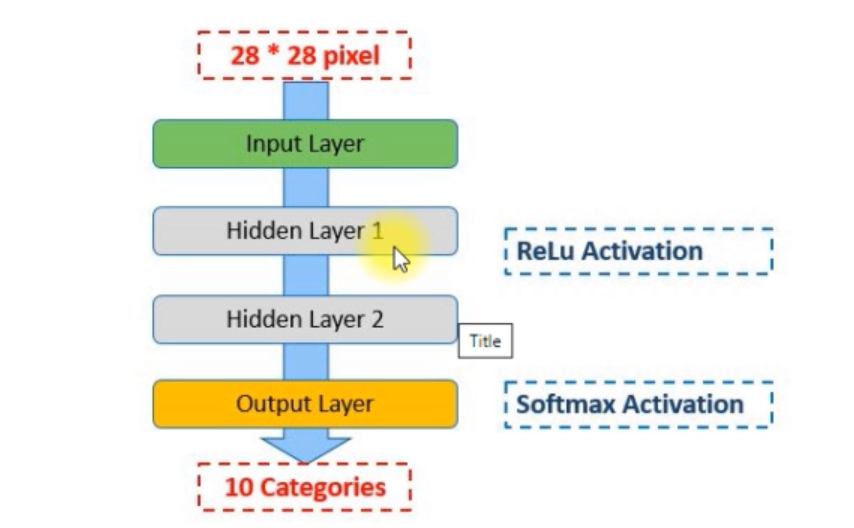

In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28])) # Flatten - to convert 2D into 1D
model.add(keras.layers.Dense(300,activation="relu"))# Hidden Layer - we have to mention the number of neurons we want here 
model.add(keras.layers.Dense(100,activation="relu"))# another hidden layer
model.add(keras.layers.Dense(10,activation="softmax")) # Output Layer

In [43]:
model.summary() #None means no limit on input data, params - No. of trainable parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
import pydot
import pydotplus
from pydotplus import graphviz
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


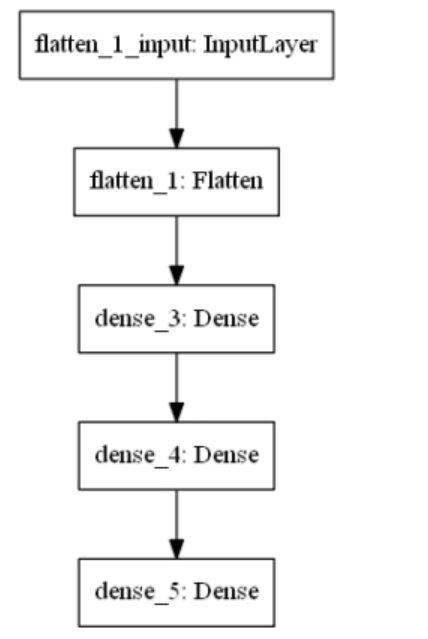

#### we can access the parameters using get_weight() method

In [45]:
weights, biases = model.layers[1].get_weights()

In [46]:
weights

array([[ 0.03574536, -0.02389931,  0.01030421, ..., -0.06151724,
        -0.0451347 ,  0.03140047],
       [-0.05467119,  0.04656268, -0.07248728, ..., -0.07038655,
        -0.03083268, -0.06513114],
       [-0.03234808, -0.00317231,  0.04102226, ..., -0.03237895,
         0.01965773, -0.00825518],
       ...,
       [-0.0630435 ,  0.07371157, -0.05752673, ...,  0.07049479,
         0.05577183, -0.02518321],
       [-0.02547856,  0.07304457,  0.04983643, ..., -0.05780029,
         0.07438232, -0.0286764 ],
       [-0.02862201,  0.01245171, -0.04573321, ...,  0.04891213,
        -0.06256616, -0.02975626]], dtype=float32)

In [47]:
weights.shape

(784, 300)

In [48]:
biases.shape

(300,)

In [49]:
#Setting learning process to train our method
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [50]:
#Fitting X_train and y_train data to train the model
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7014 - accuracy: 0.7691 - val_loss: 0.5178 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4859 - accuracy: 0.8298 - val_loss: 0.4350 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4428 - accuracy: 0.8441 - val_loss: 0.5426 - val_accuracy: 0.7964
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4164 - accuracy: 0.8552 - val_loss: 0.3956 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3981 - accuracy: 0.8612 - val_loss: 0.3798 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3793 - accuracy: 0.8662 - val_loss: 0.3726 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3666 - accuracy: 0.8717 - val_loss: 0.3620 - val_accuracy:

In [51]:
model_history.params 

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [52]:
model_history.history

{'loss': [0.7013809084892273,
  0.48594146966934204,
  0.4427852928638458,
  0.41641318798065186,
  0.39814403653144836,
  0.3792903423309326,
  0.3666006624698639,
  0.35522714257240295,
  0.34447887539863586,
  0.3354286253452301,
  0.32686883211135864,
  0.3172452747821808,
  0.31033334136009216,
  0.3044038414955139,
  0.2965405583381653,
  0.2916172444820404,
  0.28644973039627075,
  0.28021305799484253,
  0.2754233777523041,
  0.27023229002952576,
  0.2655903100967407,
  0.2606964409351349,
  0.2561509311199188,
  0.2519540786743164,
  0.24757832288742065,
  0.24343174695968628,
  0.23978641629219055,
  0.23587971925735474,
  0.23207084834575653,
  0.22846826910972595],
 'accuracy': [0.7690908908843994,
  0.829763650894165,
  0.8441454768180847,
  0.8551636338233948,
  0.8611999750137329,
  0.8662182092666626,
  0.8716545701026917,
  0.8744000196456909,
  0.8794181942939758,
  0.8807454705238342,
  0.8837090730667114,
  0.8862000107765198,
  0.889018177986145,
  0.890690922737121

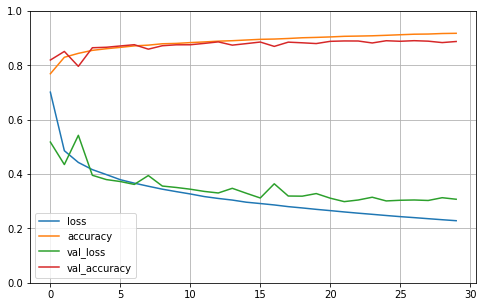

In [53]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [55]:
model.evaluate(X_test,y_test)
# Output here is - [loss,accuracy] 
# accuracy which we mentioned while training our model i.e metrics = ['accuracy']

313/313 [==============================] - 0s 789us/step - loss: 0.3388 - accuracy: 0.8794


[0.33881714940071106, 0.8794000148773193]

In [56]:
X_new = X_test[:3] # Just taking first 3 data

In [60]:
y_probe = model.predict(X_new)
y_probe.round(2) # Round off to 2

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [62]:
y_pred = model.predict_classes(X_new) # To directly predict the class without probability as above
y_pred

array([9, 2, 1], dtype=int64)

In [64]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


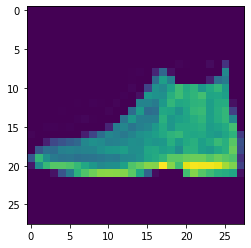

In [65]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


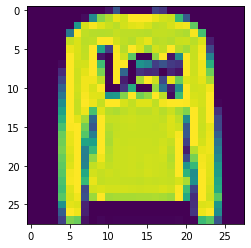

In [66]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


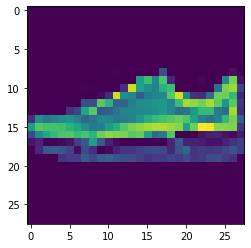

In [70]:
print(plt.imshow(X_test[9]))